Following this for the Neural networks
https://madewithml.com/courses/foundations/neural-networks/

In [154]:
#importing libraries

import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd


SEED =1234


np.random.seed(SEED)
random.seed(SEED)


In [15]:
#Loading data

url  = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/spiral.csv"

df  =pd.read_csv(url,header=0)



In [16]:
#shuffling the data

df  = df.sample(frac=1).reset_index(drop=True)
df.head(4)

,X1,X2,color
0,0.216604,0.117650,c1
1,-0.027957,-0.015701,c3
2,0.377979,0.060343,c1
3,0.261746,-0.589821,c1


In [18]:
#Data Shapes

X  = df[["X1","X2"]].values
Y = df["color"].values

print(X.shape, Y.shape)



(1500, 2) (1500,)


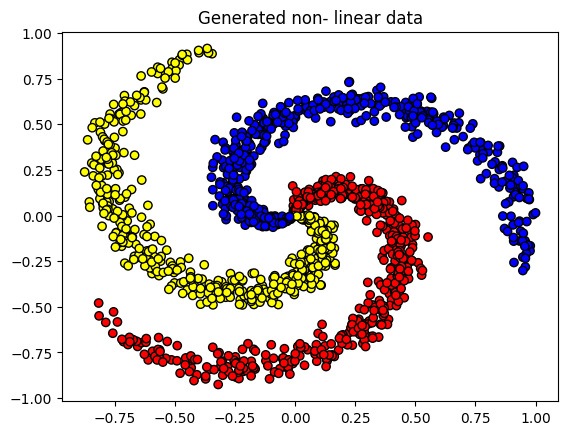

In [21]:
#Visualizing the data
plt.title("Generated non- linear data")
colors = {"c1": "red", "c2": "yellow", "c3": "blue"}

plt.scatter(X[:,0], X[:,1], c=[ colors[_y] for _y in Y], edgecolors= "k")
plt.show()

In [22]:
# Split the data
import collections
from sklearn.model_selection import train_test_split


In [94]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [93]:
def train_val_test_split(X, y, train_size):
    """Split dataset into data splits."""
    X_train, X_, y_train, y_ = train_test_split(X, y, train_size=TRAIN_SIZE, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_, y_, train_size=0.5, stratify=y_)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [95]:
# Create data splits
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(
    X=X, y=Y, train_size=TRAIN_SIZE)
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print (f"Sample point: {X_train[0]} → {y_train[0]}")


X_train: (1050, 2), y_train: (1050,)
X_val: (225, 2), y_val: (225,)
X_test: (225, 2), y_test: (225,)
Sample point: [ 0.2603229  -0.57728545] → c1


#Label Encoding

Implementing our own label encoder 

Encode Target text label to nummeric for building the model


In [96]:
import itertools

In [97]:
#Need to define  methods, fit, encode, decode, save and load
import json

class LabelEncoderImpl(object):


    def __init__(self,class_to_index={}) -> None:

        """ Intialize the object """
        self.class_to_index = {} or class_to_index   #Default class from index. 
  
        self.index_to_class = { v:k for k,v in self.class_to_index.items()} #Default indices from the classes

        self.classes_ = list(self.class_to_index.keys())

        pass

    def __len__(self):
        return len(self.class_to_index)

    def __str__(self):
        return f"<LabelEncoder(num_classes={len(self)})>"
    
    def fit(self,y):
        """Fit the encoders from the class labels"""

        classes = np.unique(y)
        for i , j in enumerate(classes):
            self.class_to_index[i] = j

        self.index_to_class = { v:k  for k,v in self.class_to_index.items()}

        self.classes  = list(self.class_to_index.keys())

        return self
        

        
    def encode(self,y):
        """ Given the class values, return the enoded labels"""

        labels = []

        for i ,item in enumerate(y):

            labels[i] = self.class_to_index[item]
        return labels
    
    def decode(self,y):
        """
        Given the encode labels,  return the class
        """
        classes =[]

        for i,j in enumerate(y):
            classes.append(self.index_to_class[j])
            

    def save(self,path):
        """save the encodings to the path """

        with open(path,"wp") as p:
            contents = {'classes_to_index':self.class_to_index}
            json.dumps(contents,p,indent=4,sort_keys=False)

    @classmethod
    def load(cls,path):
        with open(path,"r") as p:
            kwargs=json.load(fp=p)
        return cls(**kwargs)





In [98]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [99]:
# Fit on train data
label_encoder = label_encoder.fit(y_train)
classes = list(label_encoder.classes_)
print (f"classes: {classes}")

classes: ['c1', 'c2', 'c3']


In [100]:
# Convert labels to tokens
print (f"y_train[0]: {y_train[0]}")
y_train = label_encoder.transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)
print (f"y_train[0]: {y_train[0]}")

y_train[0]: c1
y_train[0]: 0


In [101]:
# Class weights
counts = np.bincount(y_train)
class_weights = {i: 1.0/count for i, count in enumerate(counts)}
print (f"counts: {counts}\nweights: {class_weights}")

counts: [350 350 350]
weights: {0: 0.002857142857142857, 1: 0.002857142857142857, 2: 0.002857142857142857}


In [115]:
#Standardize the data
from sklearn.preprocessing import StandardScaler

# Standardize the data (mean=0, std=1) using training data
X_scaler = StandardScaler().fit(X_train)


# Apply scaler on training and test data (don't standardize outputs for classification)
X_train = X_scaler.transform(X_train)
X_val = X_scaler.transform(X_val)
X_test = X_scaler.transform(X_test)


# Check (means should be ~0 and std should be ~1)
print (f"X_test[0]: mean: {np.mean(X_test[:, 0], axis=0):.1f}, std: {np.std(X_test[:, 0], axis=0):.1f}")
print (f"X_test[1]: mean: {np.mean(X_test[:, 1], axis=0):.1f}, std: {np.std(X_test[:, 1], axis=0):.1f}")


X_test[0]: mean: -0.0, std: 1.0
X_test[1]: mean: 0.0, std: 1.0


# Linear model

Before we get to our neural network, we're going to motivate non-linear activation functions by implementing a generalized linear model (logistic regression). We'll see why linear models (with linear activations) won't suffice for our dataset.

In [103]:
import torch
torch.manual_seed(SEED)


from torch import nn
import torch.nn.functional as F


In [116]:
#Shapes for model training

INPUT_DIM = X_train.shape[1]
# print(INPUT_DIM) 

# # nn.Linear expects the value as int so we'll do

# INPUT_DIM = INPUT_DIM[1]
# print(INPUT_DIM) #2


In [169]:
HIDDEN_DIMS = 100
OUTPUT_DIMS = len(classes) #3 classes, again an int

In [106]:
class LinearModel(nn.Module):
    
    def __init__(self,input_dim,hidden_dim,num_classes) -> None:
        super().__init__()
        self.fc1 = nn.Linear(input_dim,hidden_dim)
        self.fc2 = nn.Linear(hidden_dim,num_classes)


    def forward(self,x_in):
        z=self.fc1(x_in) # Linear activations/ No Activation
        z= self.fc2(z)
        return z



In [107]:
# Initialize model
model = LinearModel(input_dim=INPUT_DIM, hidden_dim=HIDDEN_DIMS, num_classes=OUTPUT_DIMS)
print (model.named_parameters)

<bound method Module.named_parameters of LinearModel(
  (fc1): Linear(in_features=2, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=3, bias=True)
)>


TRANING

In [108]:
from torch.optim import Adam


LEARNING_RATE = 1e-2
NUM_EPOCHS = 10
BATCH_SIZE = 32

In [109]:
class_weights.values()

dict_values([0.002857142857142857, 0.002857142857142857, 0.002857142857142857])

In [110]:
#Define Loss with class balance
# Note that Cross Entropy accepts weught in tensor format so

class_weights_tensors = torch.Tensor(list(class_weights.values()))   

loss_fn = nn.CrossEntropyLoss(weight=class_weights_tensors) #giving equal weights to all the classes

In [111]:
# Accuracy
def accuracy_fn(y_pred, y_true):
    n_correct = torch.eq(y_pred, y_true).sum().item() #????? Did this probably because input will be tensors
    accuracy = (n_correct / len(y_pred)) * 100
    return accuracy

In [112]:
# Optimizer
optimizer = Adam(model.parameters(), lr=LEARNING_RATE)


In [120]:
# Convert data to tensors
X_train = torch.Tensor(X_train)
y_train = torch.LongTensor(y_train)
X_val = torch.Tensor(X_val)
y_val = torch.LongTensor(y_val)
X_test = torch.Tensor(X_test)
y_test = torch.LongTensor(y_test)


In [122]:
#Training 
for epoch in range(NUM_EPOCHS):

    y_pred = model(X_train)


    assert type(y_pred)==type(torch.Tensor()),"Type not matched"

    #once we have the predictions we can calculate the loss
    loss  =loss_fn(y_pred,y_train)


    # Zero all gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    if epoch%1==0:
        predictions = y_pred.max(dim=1)[1] # class
        accuracy = accuracy_fn(y_pred=predictions, y_true=y_train)
        print (f"Epoch: {epoch} | loss: {loss:.2f}, accuracy: {accuracy:.1f}")



Epoch: 0 | loss: 0.79, accuracy: 53.8
Epoch: 1 | loss: 0.79, accuracy: 54.2
Epoch: 2 | loss: 0.79, accuracy: 54.5
Epoch: 3 | loss: 0.78, accuracy: 54.5
Epoch: 4 | loss: 0.78, accuracy: 54.8
Epoch: 5 | loss: 0.77, accuracy: 54.8
Epoch: 6 | loss: 0.77, accuracy: 54.8
Epoch: 7 | loss: 0.76, accuracy: 54.2
Epoch: 8 | loss: 0.76, accuracy: 53.8
Epoch: 9 | loss: 0.76, accuracy: 54.1


# Evaluation

In [123]:
import json
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support


In [124]:
def get_metrics(y_true, y_pred, classes):
    """Per-class performance metrics."""
    # Performance
    performance = {"overall": {}, "class": {}}

    # Overall performance
    metrics = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    performance["overall"]["precision"] = metrics[0]
    performance["overall"]["recall"] = metrics[1]
    performance["overall"]["f1"] = metrics[2]
    performance["overall"]["num_samples"] = np.float64(len(y_true))

    # Per-class performance
    metrics = precision_recall_fscore_support(y_true, y_pred, average=None)
    for i in range(len(classes)):
        performance["class"][classes[i]] = {
            "precision": metrics[0][i],
            "recall": metrics[1][i],
            "f1": metrics[2][i],
            "num_samples": np.float64(metrics[3][i]),
        }

    return performance


In [125]:
# Predictions
y_prob = F.softmax(model(X_test), dim=1)
print (f"sample probability: {y_prob[0]}")
y_pred = y_prob.max(dim=1)[1]
print (f"sample class: {y_pred[0]}")


sample probability: tensor([0.5098, 0.3073, 0.1829], grad_fn=<SelectBackward0>)
sample class: 0


In [126]:
# # Performance
performance = get_metrics(y_true=y_test, y_pred=y_pred, classes=classes)
print (json.dumps(performance, indent=2))


{
  "overall": {
    "precision": 0.505647764773607,
    "recall": 0.5066666666666667,
    "f1": 0.505418393076621,
    "num_samples": 225.0
  },
  "class": {
    "c1": {
      "precision": 0.5060240963855421,
      "recall": 0.56,
      "f1": 0.5316455696202531,
      "num_samples": 75.0
    },
    "c2": {
      "precision": 0.4492753623188406,
      "recall": 0.41333333333333333,
      "f1": 0.4305555555555556,
      "num_samples": 75.0
    },
    "c3": {
      "precision": 0.5616438356164384,
      "recall": 0.5466666666666666,
      "f1": 0.5540540540540541,
      "num_samples": 75.0
    }
  }
}


In [127]:
def plot_multiclass_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))
    cmap = plt.cm.Spectral

    X_test = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
    y_pred = F.softmax(model(X_test), dim=1)
    _, y_pred = y_pred.max(dim=1)
    y_pred = y_pred.reshape(xx.shape)
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


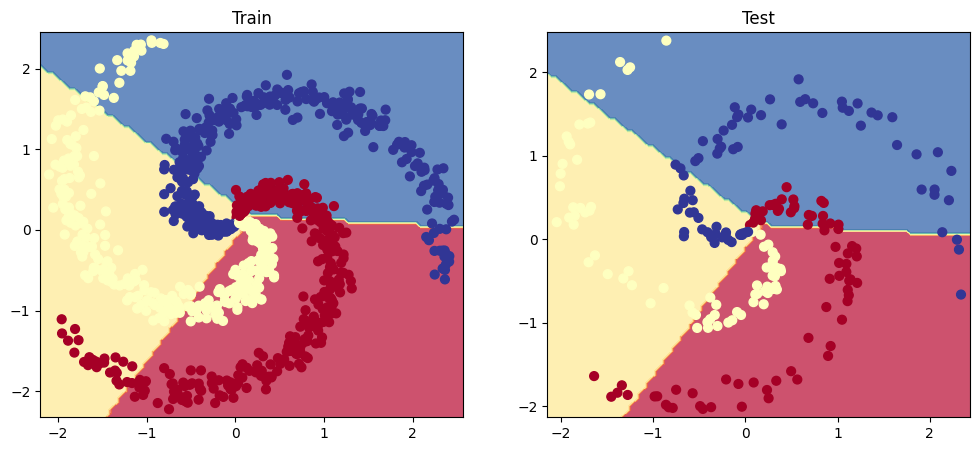

In [128]:
# Visualize the decision boundary
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_multiclass_decision_boundary(model=model, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_multiclass_decision_boundary(model=model, X=X_test, y=y_test)
plt.show()


### Activation functions

Using the generalized linear method (logistic regression) yielded poor results because of the non-linearity present in our data yet our activation functions were linear. We need to use an activation function that can allow our model to learn and map the non-linearity in our data. There are many different options so let's explore a few.

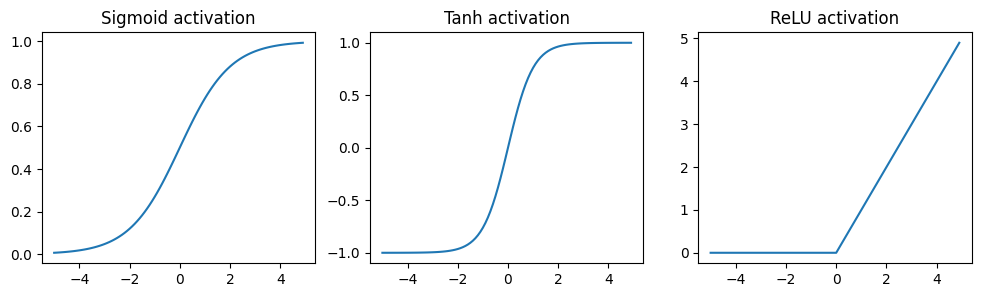

In [129]:
# Fig size
plt.figure(figsize=(12,3))

# Data
x = torch.arange(-5., 5., 0.1)

# Sigmoid activation (constrain a value between 0 and 1.)
plt.subplot(1, 3, 1)
plt.title("Sigmoid activation")
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.numpy())

# Tanh activation (constrain a value between -1 and 1.)
plt.subplot(1, 3, 2)
y = torch.tanh(x)
plt.title("Tanh activation")
plt.plot(x.numpy(), y.numpy())

# Relu (clip the negative values to 0)
plt.subplot(1, 3, 3)
y = F.relu(x)
plt.title("ReLU activation")
plt.plot(x.numpy(), y.numpy())

# Show plots
plt.show()


# NumPy

Now let's create our multilayer perceptron (MLP) which is going to be exactly like the logistic regression model but with the activation function to map the non-linearity in our data.

In [131]:
# Initialize first layer's weights
W1 = 0.01 * np.random.randn(INPUT_DIM, HIDDEN_DIMS) #DIMENSIONS (FEATURES, HIDDEN DIMS)
b1 = np.zeros((1, HIDDEN_DIMS))
print (f"W1: {W1.shape}")
print (f"b1: {b1.shape}")


W1: (2, 100)
b1: (1, 100)


In [134]:
# z1 = [NX2] · [2X100] + [1X100] = [NX100] 
z1 = np.dot(X_train, W1) + b1
print (f"z1: {z1.shape}")


z1: (1050, 100)


In [135]:
# Apply activation function
a1 = np.maximum(0, z1) # ReLU
print (f"a_1: {a1.shape}")


a_1: (1050, 100)


In [137]:
# Initialize second layer's weights
W2 = 0.01 * np.random.randn(HIDDEN_DIMS,OUTPUT_DIMS)
b2 = np.zeros((1, OUTPUT_DIMS))
print (f"W2: {W2.shape}")
print (f"b2: {b2.shape}")


W2: (100, 3)
b2: (1, 3)


In [138]:
# z2 = logits = [NX100] · [100X3] + [1X3] = [NX3]
logits = np.dot(a1, W2) + b2
print (f"logits: {logits.shape}")
print (f"sample: {logits[0]}")


logits: (1050, 3)
sample: [ 0.00015318 -0.00073805 -0.00141412]


In [139]:
# Normalization via softmax to obtain class probabilities  ???????? #This is simple SOFTMAX FORMULA exponent divided by sum of exponents
exp_logits = np.exp(logits)
y_hat = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
print (f"y_hat: {y_hat.shape}")
print (f"sample: {y_hat[0]}")
 

y_hat: (1050, 3)
sample: [0.33360655 0.33330936 0.33308409]


In [140]:
# Loss
correct_class_logprobs = -np.log(y_hat[range(len(y_hat)), y_train])
loss = np.sum(correct_class_logprobs) / len(y_train)
print (f"loss: {loss:.2f}")


loss: 1.10


In [153]:
pp = y_hat
pp[range(len(y_hat)),y_train]-=1
print(pp)

[[-1.00000333e+00  3.32961697e-06  3.61153332e-18]
 [ 1.79077115e-06 -1.00000231e+00  5.18475010e-07]
 [ 1.36922948e-12 -1.00000150e+00  1.50335060e-06]
 ...
 [-1.00000269e+00  4.09388991e-07  2.27763682e-06]
 [-1.00004458e+00  5.01488181e-07  4.40737814e-05]
 [ 4.18830625e-05 -1.00004224e+00  3.55744582e-07]]


In [141]:
# dJ/dW2
dscores = y_hat
dscores[range(len(y_hat)), y_train] -= 1
dscores /= len(y_train)
dW2 = np.dot(a1.T, dscores)
db2 = np.sum(dscores, axis=0, keepdims=True)


In [142]:
# dJ/dW1
dhidden = np.dot(dscores, W2.T)
dhidden[a1 <= 0] = 0 # ReLu backprop
dW1 = np.dot(X_train.T, dhidden)
db1 = np.sum(dhidden, axis=0, keepdims=True)


In [143]:
# Update weights
W1 += -LEARNING_RATE * dW1
b1 += -LEARNING_RATE * db1
W2 += -LEARNING_RATE * dW2
b2 += -LEARNING_RATE * db2


TRAINING

In [144]:
# Convert tensors to NumPy arrays
X_train = X_train.numpy()
y_train = y_train.numpy()
X_val = X_val.numpy()
y_val = y_val.numpy()
X_test = X_test.numpy()
y_test = y_test.numpy()


In [146]:
# Initialize random weights
W1 = 0.01 * np.random.randn(INPUT_DIM, HIDDEN_DIMS)
b1 = np.zeros((1, HIDDEN_DIMS))
W2 = 0.01 * np.random.randn(HIDDEN_DIMS, OUTPUT_DIMS)
b2 = np.zeros((1, OUTPUT_DIMS))

# Training loop
for epoch_num in range(1000):

    # First layer forward pass [NX2] · [2X100] = [NX100]
    z1 = np.dot(X_train, W1) + b1

    # Apply activation function
    a1 = np.maximum(0, z1) # ReLU

    # z2 = logits = [NX100] · [100X3] = [NX3]
    logits = np.dot(a1, W2) + b2

    # Normalization via softmax to obtain class probabilities
    exp_logits = np.exp(logits)
    y_hat = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

    # Loss
    correct_class_logprobs = -np.log(y_hat[range(len(y_hat)), y_train])
    loss = np.sum(correct_class_logprobs) / len(y_train)

    # show progress
    if epoch_num%100 == 0:
        # Accuracy
        y_pred = np.argmax(logits, axis=1)
        accuracy =  np.mean(np.equal(y_train, y_pred))
        print (f"Epoch: {epoch_num}, loss: {loss:.3f}, accuracy: {accuracy:.3f}")

    # dJ/dW2
    dscores = y_hat
    dscores[range(len(y_hat)), y_train] -= 1
    dscores /= len(y_train)
    dW2 = np.dot(a1.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)

    # dJ/dW1
    dhidden = np.dot(dscores, W2.T)
    dhidden[a1 <= 0] = 0 # ReLu backprop
    dW1 = np.dot(X_train.T, dhidden)
    db1 = np.sum(dhidden, axis=0, keepdims=True)

    # Update weights
    W1 += -1e0 * dW1
    b1 += -1e0 * db1
    W2 += -1e0 * dW2
    b2 += -1e0 * db2


Epoch: 0, loss: 1.099, accuracy: 0.441
Epoch: 100, loss: 0.568, accuracy: 0.663
Epoch: 200, loss: 0.305, accuracy: 0.875
Epoch: 300, loss: 0.192, accuracy: 0.920
Epoch: 400, loss: 0.122, accuracy: 0.959
Epoch: 500, loss: 0.087, accuracy: 0.978
Epoch: 600, loss: 0.068, accuracy: 0.987
Epoch: 700, loss: 0.055, accuracy: 0.990
Epoch: 800, loss: 0.047, accuracy: 0.990
Epoch: 900, loss: 0.042, accuracy: 0.994


Evaluation

In [147]:
class MLPFromScratch():
    def predict(self, x):
        z1 = np.dot(x, W1) + b1
        a1 = np.maximum(0, z1)
        logits = np.dot(a1, W2) + b2
        exp_logits = np.exp(logits)
        y_hat = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
        return y_hat


In [148]:
# Evaluation
model = MLPFromScratch()
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)


In [149]:
# # Performance
performance = get_metrics(y_true=y_test, y_pred=y_pred, classes=classes)
print (json.dumps(performance, indent=2))


{
  "overall": {
    "precision": 0.9956140350877192,
    "recall": 0.9955555555555555,
    "f1": 0.9955553580159118,
    "num_samples": 225.0
  },
  "class": {
    "c1": {
      "precision": 1.0,
      "recall": 1.0,
      "f1": 1.0,
      "num_samples": 75.0
    },
    "c2": {
      "precision": 0.9868421052631579,
      "recall": 1.0,
      "f1": 0.9933774834437086,
      "num_samples": 75.0
    },
    "c3": {
      "precision": 1.0,
      "recall": 0.9866666666666667,
      "f1": 0.9932885906040269,
      "num_samples": 75.0
    }
  }
}


In [150]:
def plot_multiclass_decision_boundary_numpy(model, X, y, savefig_fp=None):
    """Plot the multiclass decision boundary for a model that accepts 2D inputs.
    Credit: https://cs231n.github.io/neural-networks-case-study/

    Arguments:
        model {function} -- trained model with function model.predict(x_in).
        X {numpy.ndarray} -- 2D inputs with shape (N, 2).
        y {numpy.ndarray} -- 1D outputs with shape (N,).
    """ 
    # Axis boundaries
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Create predictions
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    # Plot
    if savefig_fp:
        plt.savefig(savefig_fp, format="png")


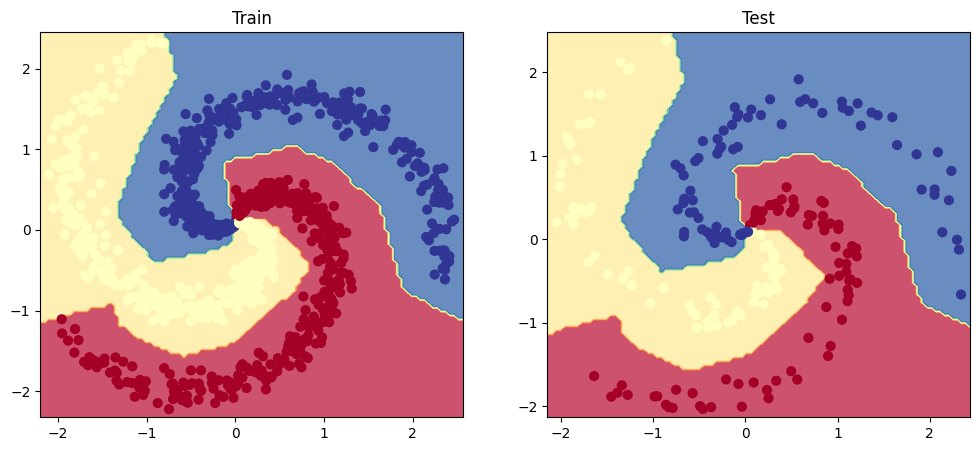

In [151]:
# Visualize the decision boundary
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_multiclass_decision_boundary_numpy(model=model, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_multiclass_decision_boundary_numpy(model=model, X=X_test, y=y_test)
plt.show()


# Pytorch in MLP


In [172]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(MLP,self).__init__()
        self.fc1 = nn.Linear(input_dim,hidden_dim)
        self.fc2=nn.Linear(hidden_dim,num_classes)


    def forward(self,x_in):
        z= F.relu(self.fc1(x_in))
        z=self.fc2(z)
        return z


In [173]:
# Initialize model
model = MLP(input_dim=INPUT_DIM, hidden_dim=HIDDEN_DIMS, num_classes=OUTPUT_DIMS)
print (model.named_parameters)


<bound method Module.named_parameters of MLP(
  (fc1): Linear(in_features=2, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=3, bias=True)
)>


TRAINING   
 

In [175]:
class_weights_tensor = torch.Tensor(list(class_weights_tensors))
loss_fn = nn.CrossEntropyLoss(weight=class_weights_tensor)

In [177]:
# Accuracy
def accuracy_fn(y_pred, y_true):
    n_correct = torch.eq(y_pred, y_true).sum().item()
    accuracy = (n_correct / len(y_pred)) * 100
    return accuracy


In [178]:
# Optimizer
optimizer = Adam(model.parameters(), lr=LEARNING_RATE)


In [179]:
# Convert data to tensors
X_train = torch.Tensor(X_train)
y_train = torch.LongTensor(y_train)
X_val = torch.Tensor(X_val)
y_val = torch.LongTensor(y_val)
X_test = torch.Tensor(X_test)
y_test = torch.LongTensor(y_test)


In [180]:
# Training
for epoch in range(NUM_EPOCHS*10):
    # Forward pass
    y_pred = model(X_train)

    # Loss
    loss = loss_fn(y_pred, y_train)

    # Zero all gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    if epoch%10==0:
        predictions = y_pred.max(dim=1)[1] # class
        accuracy = accuracy_fn(y_pred=predictions, y_true=y_train)
        print (f"Epoch: {epoch} | loss: {loss:.2f}, accuracy: {accuracy:.1f}")


Epoch: 0 | loss: 1.11, accuracy: 23.3
Epoch: 10 | loss: 0.68, accuracy: 57.0
Epoch: 20 | loss: 0.51, accuracy: 72.7
Epoch: 30 | loss: 0.39, accuracy: 88.1
Epoch: 40 | loss: 0.29, accuracy: 91.0
Epoch: 50 | loss: 0.22, accuracy: 93.3
Epoch: 60 | loss: 0.18, accuracy: 95.0
Epoch: 70 | loss: 0.15, accuracy: 96.3
Epoch: 80 | loss: 0.12, accuracy: 97.3
Epoch: 90 | loss: 0.11, accuracy: 98.1


Evaluation

In [181]:
# Predictions
y_prob = F.softmax(model(X_test), dim=1)
y_pred = y_prob.max(dim=1)[1]


In [182]:
# # Performance
performance = get_metrics(y_true=y_test, y_pred=y_pred, classes=classes)
print (json.dumps(performance, indent=2))


{
  "overall": {
    "precision": 0.9956140350877192,
    "recall": 0.9955555555555555,
    "f1": 0.9955553580159118,
    "num_samples": 225.0
  },
  "class": {
    "c1": {
      "precision": 1.0,
      "recall": 1.0,
      "f1": 1.0,
      "num_samples": 75.0
    },
    "c2": {
      "precision": 0.9868421052631579,
      "recall": 1.0,
      "f1": 0.9933774834437086,
      "num_samples": 75.0
    },
    "c3": {
      "precision": 1.0,
      "recall": 0.9866666666666667,
      "f1": 0.9932885906040269,
      "num_samples": 75.0
    }
  }
}


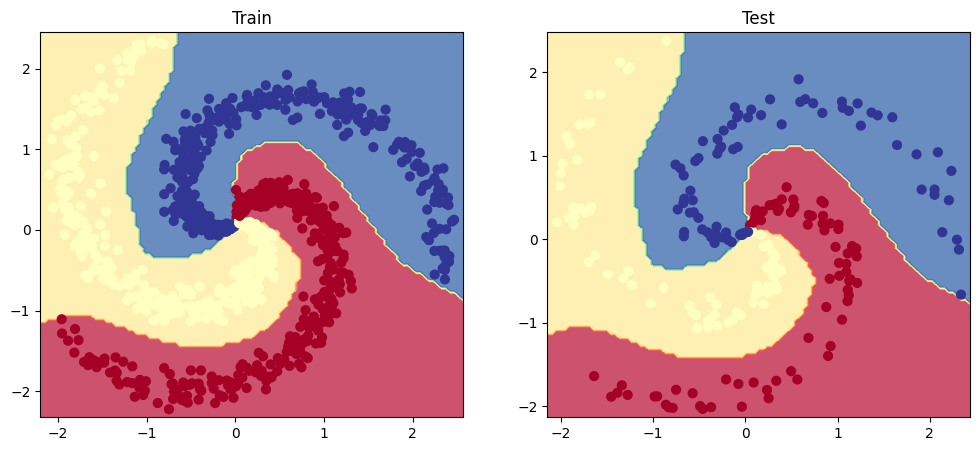

In [183]:
# Visualize the decision boundary
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_multiclass_decision_boundary(model=model, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_multiclass_decision_boundary(model=model, X=X_test, y=y_test)
plt.show()


Inference

In [184]:
# Inputs for inference
X_infer = pd.DataFrame([{"X1": 0.1, "X2": 0.1}])


In [185]:
# Standardize
X_infer = X_scaler.transform(X_infer)
print (X_infer)


[[0.1 0.1]]


c:\Users\ACER\anaconda3\envs\testing1\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [186]:
# Predict
y_infer = F.softmax(model(torch.Tensor(X_infer)), dim=1)
prob, _class = y_infer.max(dim=1)
label = label_encoder.inverse_transform(_class.detach().numpy())[0]
print (f"The probability that you have {label} is {prob.detach().numpy()[0]*100.0:.0f}%")


The probability that you have c2 is 42%


Initializing weights


So far we have been initializing weights with small random values but this isn't optimal for convergence during training. The objective is to initialize the appropriate weights such that our activations (outputs of layers) don't vanish (too small) or explode (too large), as either of these situations will hinder convergence. We can do this by sampling the weights uniformly from a bound distribution (many that take into account the precise activation function used) such that all activations have unit variance.